In [48]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import normalize
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
def read_csv(a, b, path, scaling):
    x = []
    y = []
    users = []
    x_label = ""
    y_label = ""
    reader = ''
    with open(path) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        lines = 0
        for row in reader:
            if lines >= 1:
                #print(', '.join(row))
                x.append(float(row[a]))
                y.append(float(row[b]))
                users.append(row[0])
                lines += 1
            else:
                x_label = row[a]
                y_label = row[b]
                #print(', '.join(row))
                lines += 1
    
    og_x, og_y = x, y
    if(scaling == "std"):
        x, y = (np.array(x) - np.array(x).mean())/(np.array(x).std()), (np.array(y) - np.array(y).mean())/(np.array(y).std())
    elif(scaling == "norm"):
        x, y = normalize(np.array(x)[:, np.newaxis], axis=0).ravel(), normalize(np.array(y)[:, np.newaxis], axis=0).ravel()
    
    return x, y, x_label, y_label, users, pd.read_csv(path),og_x, og_y


# Choose Category
a, b = 2, 10  # 1,9  2,10  6,10
x, y, x_label, y_label, users, csv_data, og_x, og_y = read_csv(a, b, 'tripadvisor_review.csv', 'std')

data = np.array(list(zip(x, y))).reshape(len(x), 2)

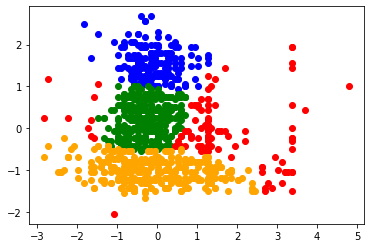

In [50]:
# training gaussian mixture model 
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','red','orange']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"], c=color[k])
plt.show()

In [51]:
from collections import Counter, defaultdict
print("\nNumber of Users in each cluster:")

count_labels = Counter(labels)

clust_num = len(count_labels)

# Get cluster indices
clusters_indices = defaultdict(list)
for index, c in enumerate(labels):
    clusters_indices[c].append(index)

# Print countries in each cluster and means
x = 0
while x < clust_num:
    print("\nCluster " + str(x + 1))
    print(f"Total Users : {count_labels[x]}")
    print("----------")
    print(f"User | Category {a} | Category {b}")
    sum_x, sum_y, n = 0, 0, 0
    for i in clusters_indices[x]:
        n += 1
        sum_x += og_x[i]
        sum_y += og_y[i]
        print(f'{users[i]} <> {og_x[i]} <> {og_y[i]}')

    print("----------")
    print(f"Mean Category {a} = {sum_x/n} [Cluster {str(x + 1)}]")
    print(f"Mean Category {b} = {sum_y/n} [Cluster {str(x + 1)}]")
    print("----------")
    x+=1


Number of Users in each cluster:

Cluster 1
Total Users : 179
----------
User | Category 2 | Category 10
User 6 <> 1.28 <> 3.66
User 7 <> 1.36 <> 3.22
User 10 <> 1.36 <> 3.12
User 22 <> 1.44 <> 3.22
User 23 <> 1.16 <> 3.66
User 38 <> 1.36 <> 3.2
User 42 <> 1.48 <> 3.38
User 46 <> 1.4 <> 3.38
User 47 <> 1.08 <> 3.22
User 51 <> 1.2 <> 3.42
User 55 <> 1.2 <> 3.42
User 56 <> 1.68 <> 3.12
User 67 <> 1.28 <> 3.34
User 74 <> 1.08 <> 3.46
User 77 <> 1.12 <> 3.36
User 81 <> 0.92 <> 3.42
User 86 <> 1.84 <> 3.34
User 91 <> 1.12 <> 3.26
User 100 <> 1.6 <> 3.1
User 105 <> 0.84 <> 3.46
User 108 <> 1.2 <> 3.42
User 120 <> 1.6 <> 3.18
User 129 <> 1.48 <> 3.34
User 135 <> 1.64 <> 3.34
User 140 <> 1.32 <> 3.2
User 141 <> 1.28 <> 3.34
User 156 <> 1.16 <> 3.42
User 158 <> 1.12 <> 3.44
User 160 <> 1.76 <> 3.36
User 162 <> 1.08 <> 3.36
User 174 <> 1.28 <> 3.28
User 175 <> 1.08 <> 3.26
User 177 <> 1.16 <> 3.26
User 184 <> 1.12 <> 3.3
User 193 <> 0.64 <> 3.52
User 194 <> 1.56 <> 3.44
User 199 <> 1.48 <> 3.26